## Spam Email Classification

Using a spambase dataset, this notebook will run the 5 following models to test for the efficiency in detecting and separating spam emails:

- Decision Tree
- Random Forest
- Ada Boost
- XGBoost
- Naive Bayes

---
When applicable, each model will use **_Grid search_** 

---

Helper functions to plot the scores:

- Score
<br> <t> * accuracy_score (train, test)
<br> <t> * F1 score (train, test)
<br> <t> * Testing Recall Score
<br> <t> * Test AUC score
<br> <t> * Classification Report

- Plot confusion matrix
- Plot ROC curve
- Plot feature importance

In [1]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, roc_auc_score, roc_curve, auc

from sklearn import tree 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import pylab as pl
import itertools
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
# to help kernel not die when running XG Boost 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
%matplotlib inline

## Train and test groups

In [67]:

data = pd.read_csv('spambase.data', header=None)
# data.rename(columns={57:'is_spam'}, inplace=True)
rename_columns()

In [68]:
data.columns

Index(['wf_make', 'wf_address', 'wf_all', 'wf_3d', 'wf_our', 'wf_over',
       'wf_remove', 'wf_internet', 'wf_order', 'wf_mail', 'wf_receive',
       'wf_will', 'wf_people', 'wf_report', 'wf_addresses', 'wf_free',
       'wf_business', 'wf_email', 'wf_you', 'wf_credit', 'wf_your', 'wf_font',
       'wf_000', 'wf_money', 'wf_hp', 'wf_hpl', 'wf_george', 'wf_650',
       'wf_lab', 'wf_labs', 'wf_telnet', 'wf_857', 'wf_data', 'wf_415',
       'wf_85', 'wf_technology', 'wf_1999', 'wf_parts', 'wf_pm', 'wf_direct',
       'wf_cs', 'wf_meeting', 'wf_original', 'wf_project', 'wf_re', 'wf_edu',
       'wf_table', 'wf_conference', 'cf_;', 'cf_(', 'cf_[', 'cf_!', 'cf_$',
       'cf_#', 'capital_average', 'capital_longest', 'capital_total',
       'is_spam'],
      dtype='object')

In [33]:

spam = data[data['is_spam'] == 1]
ham = data[data['is_spam'] == 0]

In [34]:

spam_train, spam_test = train_test_split(spam, train_size=0.6)
ham_train, ham_test = train_test_split(ham, train_size=0.6)

In [35]:
X_train = ham_train.append(spam_train)
y_train = X_train.pop('is_spam')

In [36]:
X_test = ham_test.append(spam_test)
y_test = X_test.pop('is_spam')

## Decision Tree

In [15]:
dt_clf= DecisionTreeClassifier()
dt_clf.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_pred = dt_clf.predict(X_test)

Model Scores for:  

 ----> DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 

Train Accuracy score:  0.9992750996737948
Test Accuracy score:  0.8968512486427795 

Train F1 score:  0.9990791896869246
Test F1 score:  0.8678720445062587 

Testing Precision Score:  0.8764044943820225
Testing Recall Score:  0.859504132231405
Test AUC score:  0.8903255428182115 

Classification Report:  
               precision    recall  f1-score   support

           0       0.91      0.92      0.92      1116
           1       0.88      0.86      0.87       726

   micro avg       0.90      0.90      0.90      1842
   macro avg       0.89      0.89      0.89      1842
weighted avg       0.90      0.90      0

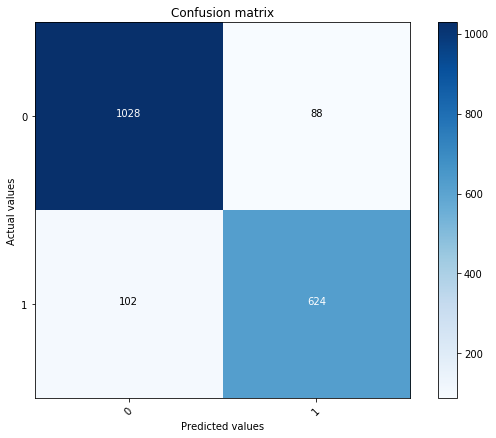

AUC (pred_proba):  0.8908969953691361


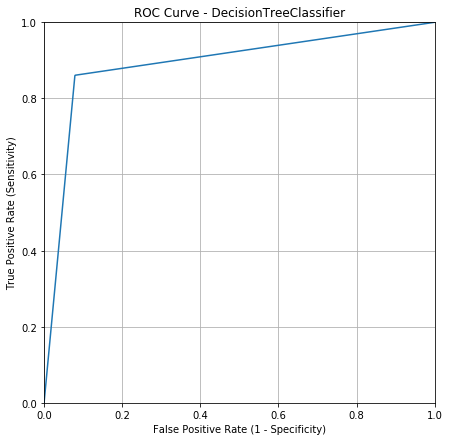

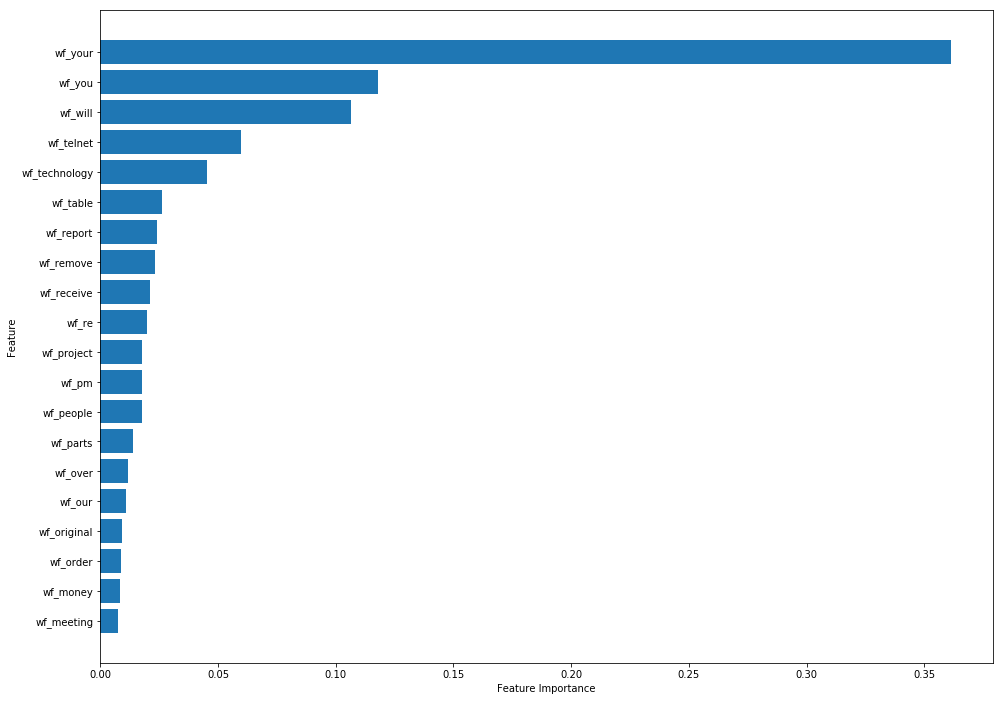

In [17]:
all_in_one_scorer(dt_clf, X_train, X_test, y_train, y_test, y_pred)


## Random Forest

In [18]:
param_grid = {
    "n_estimators": [90, 100],
    'max_depth': [1,5,20],
}

In [19]:
forest_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='precision', cv=None, n_jobs=1)
forest_grid_search.fit(X_train, y_train)

best_parameters = forest_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# training_preds = grid_clf.predict(X_train)
# val_preds = grid_clf.predict(X_test)
# training_accuracy = accuracy_score(y_train, training_preds)
# val_accuracy = accuracy_score(y_test, val_preds)

# print("")
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

# training_precision = precision_score(y_train, training_preds)
# val_precision = precision_score(y_test, val_preds)

# print("")
# print("Training Precision: {:.4}%".format(training_precision * 100))
# print("Validation Precision: {:.4}%".format(val_precision * 100))

Grid Search found the following optimal parameters: 
max_depth: 1
n_estimators: 100


In [20]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
y_pred = forest.predict(X_test)

Model Scores for:  

 ----> RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 

Train Accuracy score:  0.8339978252990213
Test Accuracy score:  0.8382193268186754 

Train F1 score:  0.7370838117106774
Test F1 score:  0.7457337883959044 

Testing Precision Score:  0.9798206278026906
Testing Recall Score:  0.6019283746556474
Test AUC score:  0.7969319292633076 

Classification Report:  
               precision    recall  f1-score   support

           0       0.79      0.99      0.88      1116
           1       0.98      0.60      0.75       726

   micro avg       0.84      0.84      0.84      1842
   macro avg       0.

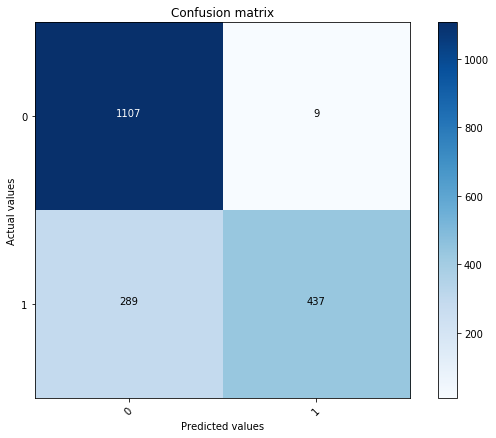

AUC (pred_proba):  0.9598662578867858


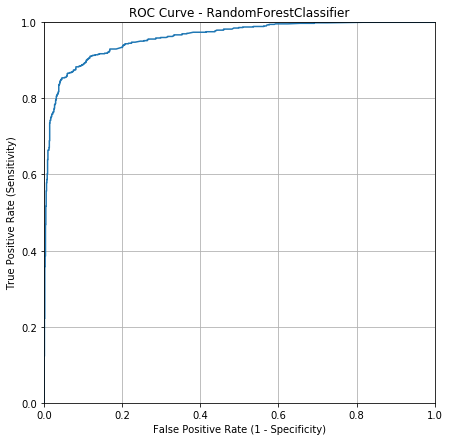

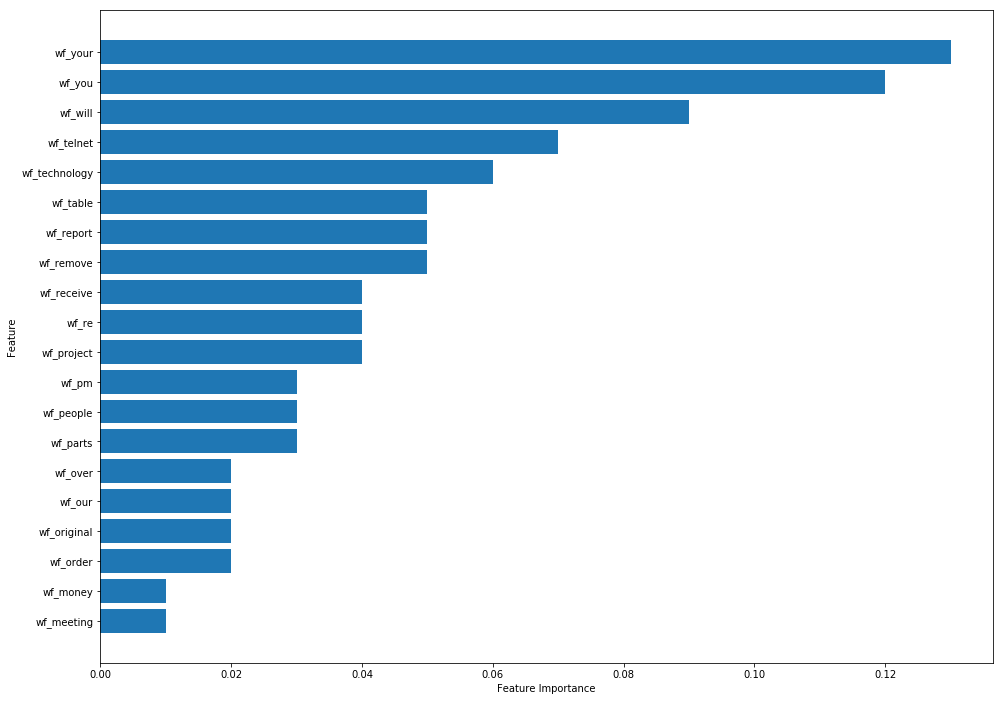

In [22]:
all_in_one_scorer(forest, X_train, X_test, y_train, y_test, y_pred)

## Ada Boost 

In [23]:
adaboost_param_grid = {
    'n_estimators': [50, 100, 250],
    'learning_rate': [1.0, 0.5, 0.1]
}

In [24]:
adaboost_grid_search = GridSearchCV(AdaBoostClassifier(), adaboost_param_grid, scoring='precision', cv=3)
adaboost_grid_search.fit(X_train, y_train)

best_parameters = adaboost_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
n_estimators: 50


In [25]:
adaboost_clf = AdaBoostClassifier(n_estimators=250, learning_rate= 0.1)
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=250, random_state=None)

In [26]:
y_pred = adaboost_clf.predict(X_test)

Model Scores for:  

 ----> AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=250, random_state=None) 

Train Accuracy score:  0.9492569771656397
Test Accuracy score:  0.9527687296416938 

Train F1 score:  0.9346405228758169
Test F1 score:  0.9396252602359473 

Testing Precision Score:  0.9468531468531468
Testing Recall Score:  0.9325068870523416
Test AUC score:  0.9492283539204359 

Classification Report:  
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      1116
           1       0.95      0.93      0.94       726

   micro avg       0.95      0.95      0.95      1842
   macro avg       0.95      0.95      0.95      1842
weighted avg       0.95      0.95      0.95      1842
 



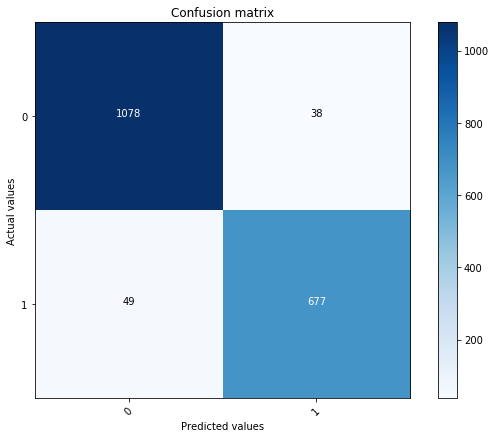

AUC (pred_proba):  0.9860635929184316


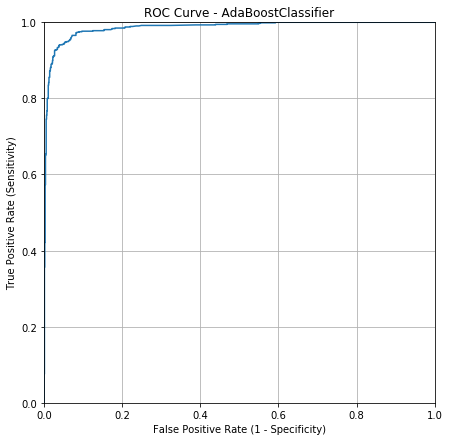

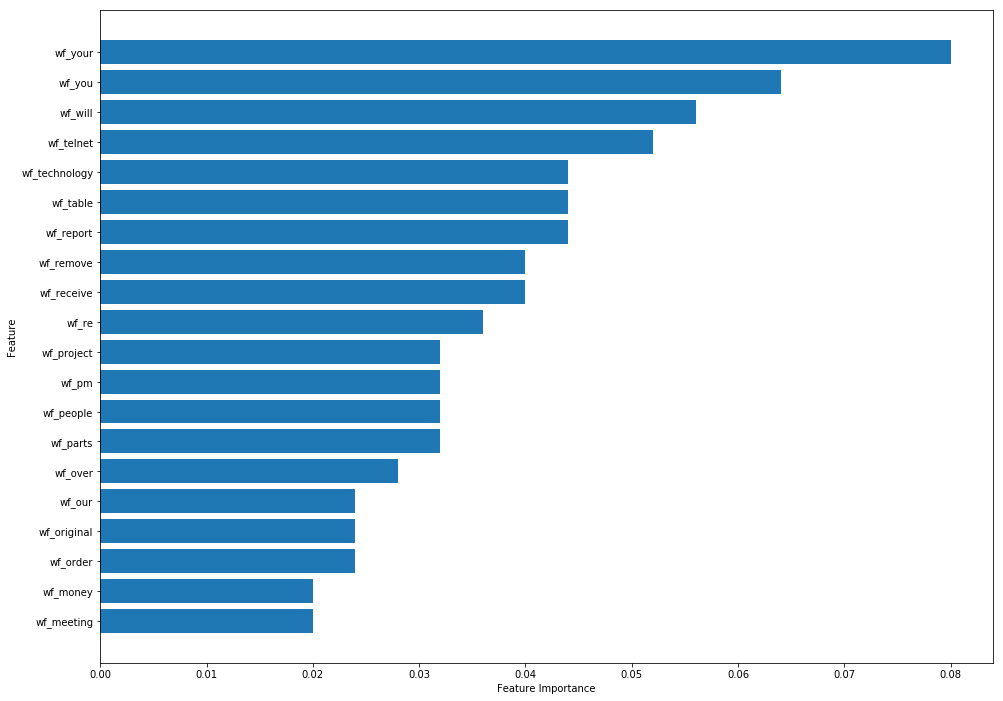

In [27]:
all_in_one_scorer(adaboost_clf, X_train, X_test, y_train, y_test, y_pred)

## XGBoost 

In [37]:
xgboost_param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [38]:
clf = xgb.XGBClassifier()
xgboost_grid_search = GridSearchCV(xgb.XGBClassifier(), xgboost_param_grid, scoring='precision', cv=3)
xgboost_grid_search.fit(np.array(X_train), np.array(y_train))

best_parameters = xgboost_grid_search.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 250
subsample: 0.7


In [40]:
xgboost_clf = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 6, min_child_weight= 10, 
                                n_estimators= 250, subsample= 0.7)
xgboost_clf.fit(np.array(X_train), np.array(y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=10, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1)

In [43]:
y_pred = xgboost_clf.predict(np.array(X_test))

Model Scores for:  

 ----> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=10, missing=None,
       n_estimators=250, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=0.7, verbosity=1) 

Train Accuracy score:  0.9789778905400507
Test Accuracy score:  0.9467969598262758 

Train F1 score:  0.9731481481481482
Test F1 score:  0.9319444444444445 

Testing Precision Score:  0.9397759103641457
Testing Recall Score:  0.9242424242424242
Test AUC score:  0.9428559791463017 

Classification Report:  
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1116
           1       0.94      0.92      0.93       726

   micro avg       0.95      0.95      0.95      1842
   macro avg

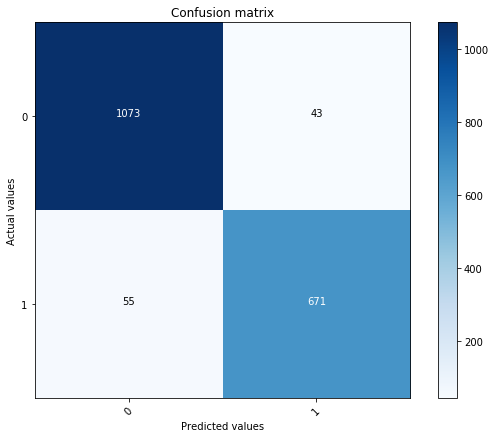

AUC (pred_proba):  0.9839123147407605


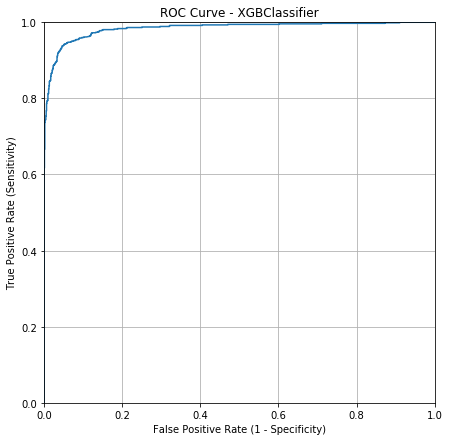

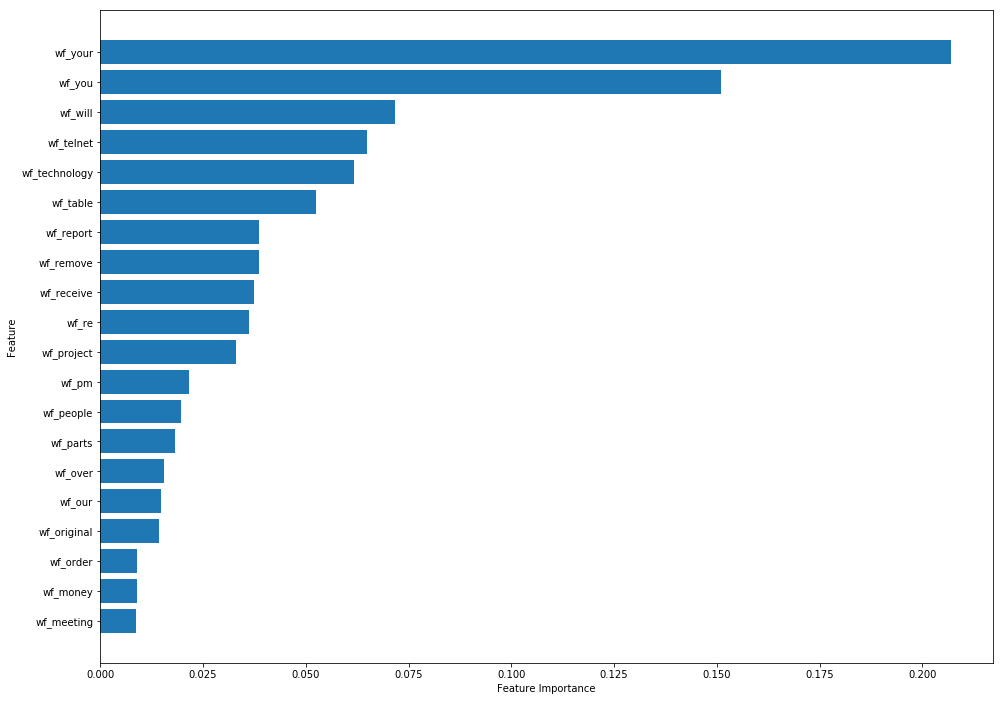

In [71]:
xgb_all_in_one_scorer(xgboost_clf, np.array(X_train), np.array(X_test), y_train, y_test, y_pred, data)

## Naive Bayes

In [72]:
bayes_clf = MultinomialNB()
bayes_clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [73]:
bayes_clf.score(X_test, y_test)

0.7958740499457112

In [74]:
bayes_clf.score(X_train, y_train)

0.7720188474084814

Model Scores for:  

 ----> MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 

Train Accuracy score:  0.7720188474084814
Test Accuracy score:  0.7958740499457112 

Train F1 score:  0.704
Test F1 score:  0.7366946778711485 

Testing Precision Score:  0.7492877492877493
Testing Recall Score:  0.7245179063360881
Test AUC score:  0.7834059065730621 

Classification Report:  
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1116
           1       0.75      0.72      0.74       726

   micro avg       0.80      0.80      0.80      1842
   macro avg       0.79      0.78      0.79      1842
weighted avg       0.79      0.80      0.80      1842
 



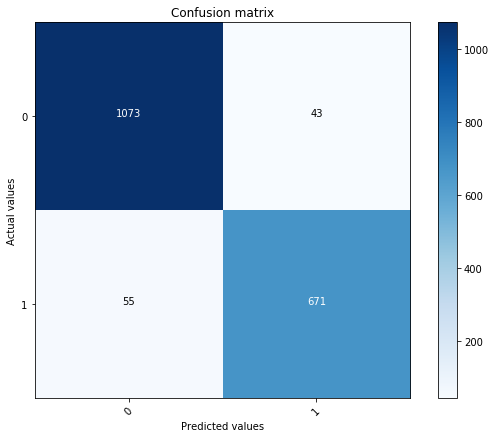

AUC (pred_proba):  0.8370385181235621


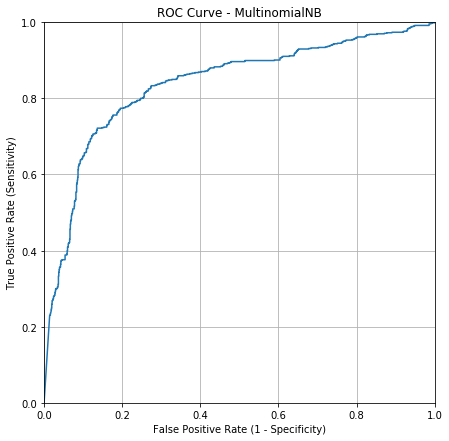

In [75]:
bayes_all_in_one_scorer(bayes_clf, X_train, X_test, y_train, y_test, y_pred)

### Helper functions

In [2]:
def score_model(clf, X_train, X_test, y_train, y_test):
    
    print('Model Scores for: ', '\n\n','---->', clf, '\n')
    print('Train Accuracy score: ', accuracy_score(y_train, clf.predict(X_train)))
    print('Test Accuracy score: ', accuracy_score(y_test, clf.predict(X_test)),'\n')
    print('Train F1 score: ', f1_score(y_train, clf.predict(X_train)))
    print('Test F1 score: ', f1_score(y_test, clf.predict(X_test)), '\n')
    print("Testing Precision Score: ", precision_score(y_test, clf.predict(X_test)))
    print("Testing Recall Score: ", recall_score(y_test, clf.predict(X_test)))
    print('Test AUC score: ', roc_auc_score(y_test, clf.predict(X_test)), '\n')
    print('Classification Report: ', '\n', classification_report(y_test, clf.predict(X_test)), '\n')
    
    return #clf

In [3]:
def ROC_func(clf, X_test, y_test):
    
    y_pred_prob = clf.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(7,7))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title(f'ROC Curve - {clf.__class__.__name__}')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

    print('AUC (pred_proba): ', roc_auc_score(y_test, y_pred_prob))

In [4]:
def plot_confusion_matrix(y_test, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#     #Add Normalization Option
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')
    plt.show()

In [5]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [6]:
def plot_feature_importance(model, x_train, n=20):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

In [7]:
def all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, classes=set(data['is_spam']))
    ROC_func(clf, X_test, y_test)
    plot_feature_importance(clf, X_train)
    
    return #clf

In [65]:
def xgb_all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred, data):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, classes=set(data['is_spam']))
    ROC_func(clf, X_test, y_test)
    xgb_plot_feature_importance(clf, X_train, data)
    
    return #clf

In [8]:
def bayes_all_in_one_scorer(clf, X_train, X_test, y_train, y_test, y_pred):
    
    score_model(clf, X_train, X_test, y_train, y_test)
    plot_confusion_matrix(y_test, y_pred, classes=set(data['is_spam']))
    ROC_func(clf, X_test, y_test)
    
    return #clf

In [31]:
feat_col = ["wf_make", "wf_address", "wf_all", "wf_3d", "wf_our", "wf_over", "wf_remove", "wf_internet", 
            "wf_order", "wf_mail",
            "wf_receive", "wf_will", "wf_people", "wf_report", "wf_addresses", "wf_free", "wf_business", 
            "wf_email", "wf_you",
            "wf_credit", "wf_your", "wf_font", "wf_000", "wf_money", "wf_hp", "wf_hpl", "wf_george", "wf_650", 
            "wf_lab", "wf_labs", 
            "wf_telnet", "wf_857", "wf_data", "wf_415", "wf_85", "wf_technology", "wf_1999", "wf_parts", 
            "wf_pm", "wf_direct", "wf_cs",
            "wf_meeting", "wf_original", "wf_project", "wf_re", "wf_edu", "wf_table", "wf_conference", 
            "cf_;", "cf_(", "cf_[", "cf_!", "cf_$", "cf_#", "capital_average", 
            "capital_longest", "capital_total", "is_spam"]

feat_col_np = np.array(feat_col)

def rename_columns():
    data.columns = feat_col_np
    return

In [ ]:
"""
Parameter tuning improved performance marginally, by about 6%. 
This is good, but still falls short of the top testing score of the 
Decision Tree Classifier by about 7%. Which model to ship to production 
would depend on several factors, such as the overall goal, and how 
noisy the dataset is. If the dataset is particularly noisy, 
the Random Forest model would likely be preferable, 
since the ensemble approach makes it more resistant to variance in the data. 
If the data is fairly stable from batch to batch and not too noisy, 
or if higher accuracy had a disproportionate effect on our business goals, 
then I would go with the Decision Tree Classifier because it scored higher.
"""

In [70]:
def xgb_plot_feature_importance(model, x_train, data, n=20):
    # extract and sort the feature importance
    features = model.feature_importances_
    df_xgb = data.drop('is_spam', axis =1)
    feature_names = df_xgb.columns.values
    

    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return